In [1]:
import pandas as pd
import numpy as np

In [2]:
from classes.vqa_model_predictor import VqaModelPredictor, DefaultVqaModelPredictor
from common.DAL import get_models_data_frame, get_model
from evaluate.VqaMedEvaluatorBase import VqaMedEvaluatorBase
from common.functions import get_highlighted_function_code
import vqa_logger 


Using TensorFlow backend.


In [38]:
df_models = get_models_data_frame()
try:
    df_show = df_models.sort_values(by=['wbss', 'bleu'], ascending=False).head()
except KeyError: #if no scode yet
    df_show = df_models
    df_show['wbss'] = np.nan
    df_show['bleu'] = np.nan

    
df_show.tail()

,wbss,model_id,bleu,models,accuracy,recall_val,val_accuracy,precsision,class_strategy,id,...,history_location,activation,f1_score,image_base_net,notes,f1_score_val,loss,recall,val_loss,model_scores
0,0.253658,1,0.344659,"Model(id=1,\n\tmodel_location=C:\Users\Public\...",0.169138,0.232202,0.204,0.285938,None,1,...,C:\Users\Public\Documents\Data\2019\models\201...,tanh,None,vgg19,First 2019 model,None,-0.26482,0.189848,-0.285407,"[ModelScore(model_id=1, bleu=0.344658670979377..."


In [4]:
import logging
import  vqa_logger 
logger = logging.getLogger(__name__)
import IPython


In [5]:
known_good_model = 163#85
model_id = known_good_model #df_show.id.iloc[0]
model_id = 1#int(model_id)
mp = DefaultVqaModelPredictor(model_id)
mp

[2019-02-17 21:08:00][DEBUG] Getting model #1 (First 2019 model)
[2019-02-17 21:08:04][DEBUG] Loading Model: 0:00:04.335649
[2019-02-17 21:08:04][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-17 21:08:04][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-17 21:08:04][DEBUG] Loading parquet: 0:00:00.000052
[2019-02-17 21:08:04][WARNING] No data found for test set
[2019-02-17 21:08:04][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-17 21:08:04][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-17 21:08:05][DEBUG] Loading parquet: 0:00:01.048312
[2019-02-17 21:08:05][DEBUG] Converting to pandas: 0:00:00.006376


In [6]:
mp.df_validation.head(2)

,image_name,question,answer,path,processed_question,processed_answer,diagnosis,question_category,answer_embedding,question_embedding,group
12792,synpic54733.jpg,what imaging modality was used to take this im...,ct with iv contrast,C:\Users\Public\Documents\Data\2019\validation...,imaging modality used take image?,ct iv contrast,,Modality,"[0.9566164016723633, 1.1977665424346924, 0.992...","[-0.38250797986984253, 2.5355920791625977, -1....",validation
12793,synpic25647.jpg,what kind of scan is this?,xr - plain film,C:\Users\Public\Documents\Data\2019\validation...,kind scan this?,xr - plain film,,Modality,"[2.1364431381225586, 0.8484694957733154, -0.96...","[-0.01856657862663269, 0.7099074125289917, -1....",validation


In [7]:
code = get_highlighted_function_code(mp.predict,remove_comments=False)
IPython.display.display(code)

In [8]:
df_data = mp.df_validation
df_predictions = mp.predict(mp.df_validation)
df_predictions.head()

[2019-02-17 21:17:12][DEBUG] Raw model prediction: 0:08:51.116080


,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12792,ct with iv contrast,synpic54733.jpg,what imaging modality was used to take this im...,yes neck axial skull contents,"[(0.266), (0.140), (0.983), (0.148), (0.206)]",C:\Users\Public\Documents\Data\2019\validation...
12793,xr - plain film,synpic25647.jpg,what kind of scan is this?,film plain pleura frontal musculoskeletal,"[(0.665), (0.651), (0.426), (0.270), (0.119)]",C:\Users\Public\Documents\Data\2019\validation...
12794,no,synpic35681.jpg,was the mri taken with contrast?,yes axial coronal contents sagittal,"[(0.189), (0.380), (0.290), (0.200), (0.363)]",C:\Users\Public\Documents\Data\2019\validation...
12795,t2,synpic39641.jpg,"is this a t1 weighted, t2 weighted, or flair i...",axial skull contents sagittal musculoskeletal,"[(0.572), (0.169), (0.187), (0.174), (0.470)]",C:\Users\Public\Documents\Data\2019\validation...
12796,yes,synpic35693.jpg,is this a noncontrast mri?,yes skull contents sagittal musculoskeletal,"[(0.283), (0.143), (0.281), (0.628), (0.147)]",C:\Users\Public\Documents\Data\2019\validation...


In [9]:
df_predictions.describe()

,answer,image_name,question,prediction,probabilities,path
count,2000,2000,2000,2000,2000,2000
unique,470,500,186,203,500,500
top,axial,synpic60065.jpg,what abnormality is seen in the image?,yes skull coronal contents sagittal,"[(0.229), (0.191), (0.407), (0.242), (0.247)]",C:\Users\Public\Documents\Data\2019\validation...
freq,213,4,133,120,4,4


In [10]:
idx = 42
image_names = df_predictions.image_name.values
image_name = image_names[idx]

df_image = df_predictions[df_predictions.image_name == image_name]
# print(f'Result: {set(df_image.prediction)}')

image_path = df_image.path.values[0]
df_image

,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12834,xr - plain film,synpic32893.jpg,what type of imaging modality is shown?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...
13334,ap,synpic32893.jpg,what is the plane of this x-ray?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...
13834,gastrointestinal,synpic32893.jpg,what part of the body is being imaged?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...
14334,small bowel obstruction,synpic32893.jpg,what is most alarming about this x-ray?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...


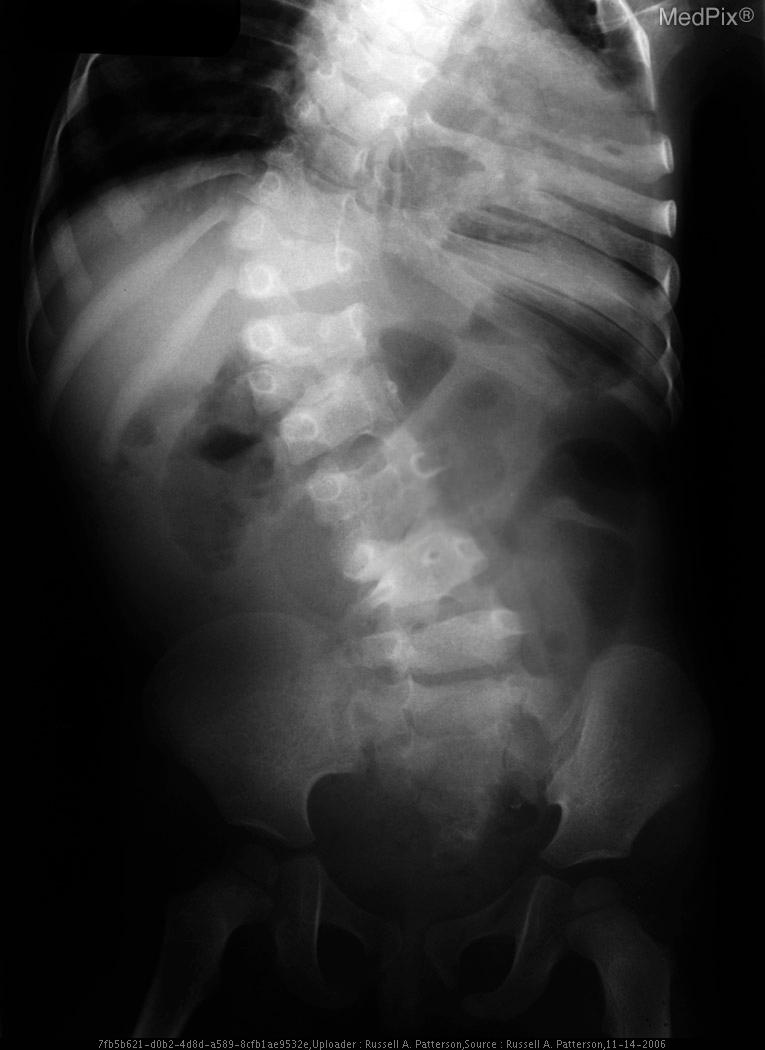

In [11]:
from IPython.display import Image
Image(filename = image_path, width=400, height=400)

In [12]:
df_image = df_data[df_data.image_name == image_name].copy().reset_index()
image_prediction = mp.predict(df_image)
image_prediction

[2019-02-17 21:17:35][DEBUG] Raw model prediction: 0:00:09.115073


,answer,image_name,question,prediction,probabilities,path
index,,,,,,
0,xr - plain film,synpic32893.jpg,what type of imaging modality is shown?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...
1,ap,synpic32893.jpg,what is the plane of this x-ray?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...
2,gastrointestinal,synpic32893.jpg,what part of the body is being imaged?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...
3,small bowel obstruction,synpic32893.jpg,what is most alarming about this x-ray?,film plain pleura lateral gastrointestinal,"[(0.741), (0.728), (0.260), (0.336), (0.232)]",C:\Users\Public\Documents\Data\2019\validation...


## Evaluating the Model

In [13]:
validation_prediction = df_predictions
predictions = validation_prediction.prediction.values
ground_truth = validation_prediction.answer.values
results = VqaMedEvaluatorBase.get_all_evaluation(predictions=predictions, ground_truth=ground_truth)
print(f'Got results of\n{results}')

Got results of
{'bleu': 0.34465867097937763, 'wbss': 0.25365822186051706}


In [37]:
sampled = validation_prediction.sample(1)
sample_image_name = sampled.image_name.values[0]
validation_prediction[validation_prediction.image_name == sample_image_name]


,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12806,mr - t1w - noncontrast,synpic23496.jpg,what imaging modality was used to take this im...,yes neck skull coronal contents,"[(0.369), (0.287), (0.508), (0.776), (0.444)]",C:\Users\Public\Documents\Data\2019\validation...
13306,coronal,synpic23496.jpg,what is the plane of the image?,yes neck skull coronal contents,"[(0.369), (0.287), (0.508), (0.776), (0.444)]",C:\Users\Public\Documents\Data\2019\validation...
13806,skull and contents,synpic23496.jpg,what organ system is visualized?,yes neck skull coronal contents,"[(0.369), (0.287), (0.508), (0.776), (0.444)]",C:\Users\Public\Documents\Data\2019\validation...
14306,imaging in traumatic brain injury,synpic23496.jpg,what is most alarming about this mri?,yes neck skull coronal contents,"[(0.369), (0.287), (0.508), (0.776), (0.444)]",C:\Users\Public\Documents\Data\2019\validation...
